In [101]:
import numpy as np
from sklearn.preprocessing import MaxAbsScaler
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, accuracy_score
import matplotlib.pyplot as plt

In [103]:
def plot_db(X, y, model):
    reduced_data = X[:, :2]
    model.fit(reduced_data, y)
    h = 0.2
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [2]:
X, y = make_circles(1000, factor=.1, noise=.1)

X_transform = MaxAbsScaler().fit_transform(X)
X_train, X_test_validation, Y_train, Y_test_validation = train_test_split(X_transform, y, test_size=0.2)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_test_validation, Y_test_validation, test_size=0.5)

In [3]:
MLPClassifier().get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [109]:
param_grid = {
  'hidden_layer_sizes': [(25,25), (30,30), (40,40), (50, 50), (100,), (150, 150), (250, 250), (300,), (500,)],
  'max_iter': [5000]
}
mlpc = MLPClassifier(warm_start = True)
grid_search_mlpc = GridSearchCV(mlpc, param_grid=param_grid, cv=5)
grid_search_mlpc.fit(X_validation, Y_validation)

grid_search_mlpc.best_params_

{'hidden_layer_sizes': (25, 25), 'max_iter': 5000}

In [33]:
grid_search_mlpc_predict = grid_search_mlpc.predict(X_test)

lbfgs_mlpc = MLPClassifier(max_iter=5000, hidden_layer_sizes=(25, 25), solver='lbfgs', warm_start = True)
lbfgs_mlpc.fit(X_train, Y_train)
lbfgs_mlpc_predict = lbfgs_mlpc.predict(X_test)

sgd_mlpc = MLPClassifier(max_iter=5000, hidden_layer_sizes=(25, 25), solver='sgd', warm_start = True)
sgd_mlpc.fit(X_train, Y_train)
sgd_mlpc_predict = lbfgs_mlpc.predict(X_test)

adam_mlpc = MLPClassifier(max_iter=5000, hidden_layer_sizes=(25, 25), solver='adam', warm_start = True)
adam_mlpc.fit(X_train, Y_train)
adam_mlpc_predict = lbfgs_mlpc.predict(X_test)

accuracy_score(Y_test, grid_search_mlpc_predict), accuracy_score(Y_test, sgd_mlpc_predict),accuracy_score(Y_test, adam_mlpc_predict)

(1.0, 1.0, 1.0)

In [34]:
print("ACCURACY (test, train):", (round(lbfgs_mlpc.score(X_test, Y_test), 3), round(lbfgs_mlpc.score(X_train, Y_train), 3)))
#print("Значення функцiї втрат на 3 перших інтераціях:", [round(elem, 3) for elem in lbfgs_mlpc.loss_curve_[:3]])
#print("Значення функцiї втрат на 3 останніх інтераціях:", [round(elem, 3) for elem in lbfgs_mlpc.loss_curve_[-3:]])
print("PRECISION:", precision_score(Y_test, lbfgs_mlpc_predict))
print("RECALL:", recall_score(Y_test, lbfgs_mlpc_predict))
print("F1:", f1_score(Y_test, lbfgs_mlpc_predict))
print("roc_auc_score:", roc_auc_score(Y_test, lbfgs_mlpc_predict))

ACCURACY (test, train): (1.0, 1.0)
PRECISION: 1.0
RECALL: 1.0
F1: 1.0
roc_auc_score: 1.0


CONFUSION MATRIX TEST:


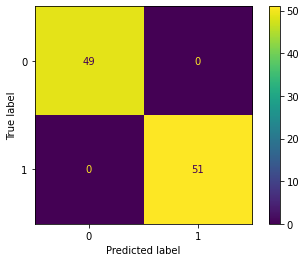

In [35]:
print("CONFUSION MATRIX TEST:")

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, lbfgs_mlpc_predict))
display.plot()
plt.show()

ROC curve:


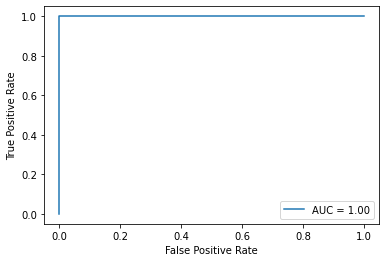

In [36]:
print("ROC curve:")
display1 = RocCurveDisplay(roc_auc=roc_auc_score(Y_test, lbfgs_mlpc_predict),
                           fpr=roc_curve(Y_test, lbfgs_mlpc_predict)[0],
                           tpr=roc_curve(Y_test, lbfgs_mlpc_predict)[1])
display1.plot()
plt.show()

Precision recall curve:


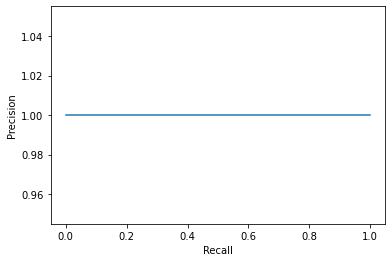

In [37]:
print("Precision recall curve:")
display2 = PrecisionRecallDisplay(precision=precision_recall_curve(Y_test, lbfgs_mlpc_predict)[0],
                                  recall=precision_recall_curve(Y_test, lbfgs_mlpc_predict)[1])
display2.plot()
plt.show()

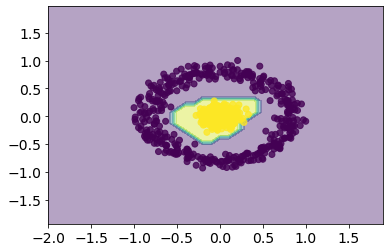

In [104]:
plt.figure()
plot_db(X_train, Y_train, lbfgs_mlpc)
plt.show()

In [38]:
print("ACCURACY (test, train):", (round(sgd_mlpc.score(X_test, Y_test), 3), round(sgd_mlpc.score(X_train, Y_train), 3)))
#print("Значення функцiї втрат на 3 перших інтераціях:", [round(elem, 3) for elem in lbfgs_mlpc.loss_curve_[:3]])
#print("Значення функцiї втрат на 3 останніх інтераціях:", [round(elem, 3) for elem in lbfgs_mlpc.loss_curve_[-3:]])
print("PRECISION:", precision_score(Y_test, sgd_mlpc_predict))
print("RECALL:", recall_score(Y_test, sgd_mlpc_predict))
print("F1:", f1_score(Y_test, sgd_mlpc_predict))
print("roc_auc_score:", roc_auc_score(Y_test, sgd_mlpc_predict))

ACCURACY (test, train): (1.0, 1.0)
PRECISION: 1.0
RECALL: 1.0
F1: 1.0
roc_auc_score: 1.0


CONFUSION MATRIX TEST:


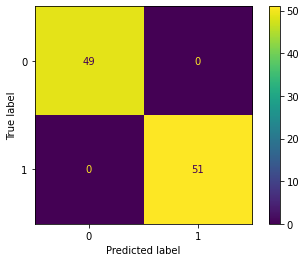

In [39]:
print("CONFUSION MATRIX TEST:")

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, sgd_mlpc_predict))
display.plot()
plt.show()

ROC curve:


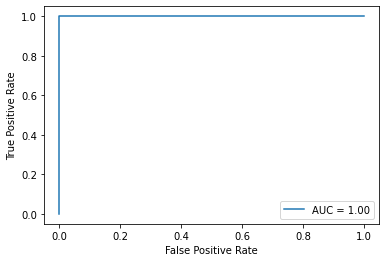

In [40]:
print("ROC curve:")
display1 = RocCurveDisplay(roc_auc=roc_auc_score(Y_test, sgd_mlpc_predict),
                           fpr=roc_curve(Y_test, sgd_mlpc_predict)[0],
                           tpr=roc_curve(Y_test, sgd_mlpc_predict)[1])
display1.plot()
plt.show()

Precision recall curve:


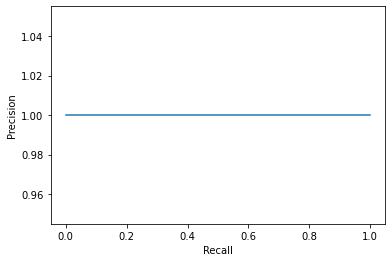

In [41]:
print("Precision recall curve:")
display2 = PrecisionRecallDisplay(precision=precision_recall_curve(Y_test, sgd_mlpc_predict)[0],
                                  recall=precision_recall_curve(Y_test, sgd_mlpc_predict)[1])
display2.plot()
plt.show()

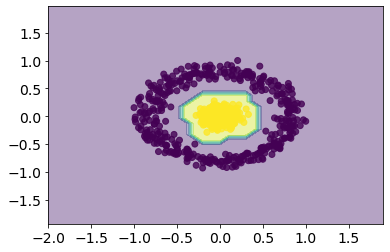

In [105]:
plt.figure()
plot_db(X_train, Y_train, sgd_mlpc)
plt.show()

In [42]:
print("ACCURACY (test, train):", (round(adam_mlpc.score(X_test, Y_test), 3), round(adam_mlpc.score(X_train, Y_train), 3)))
print("Значення функцiї втрат на 3 перших інтераціях:", [round(elem, 3) for elem in adam_mlpc.loss_curve_[:3]])
print("Значення функцiї втрат на 3 останніх інтераціях:", [round(elem, 3) for elem in adam_mlpc.loss_curve_[-3:]])
print("PRECISION:", precision_score(Y_test, adam_mlpc_predict))
print("RECALL:", recall_score(Y_test, adam_mlpc_predict))
print("F1:", f1_score(Y_test, adam_mlpc_predict))
print("roc_auc_score:", roc_auc_score(Y_test, adam_mlpc_predict))

ACCURACY (test, train): (1.0, 1.0)
Значення функцiї втрат на 3 перших інтераціях: [0.702, 0.692, 0.682]
Значення функцiї втрат на 3 останніх інтераціях: [0.007, 0.007, 0.007]
PRECISION: 1.0
RECALL: 1.0
F1: 1.0
roc_auc_score: 1.0


CONFUSION MATRIX TEST:


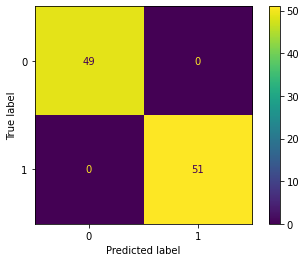

In [43]:
print("CONFUSION MATRIX TEST:")

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, adam_mlpc_predict))
display.plot()
plt.show()

ROC curve:


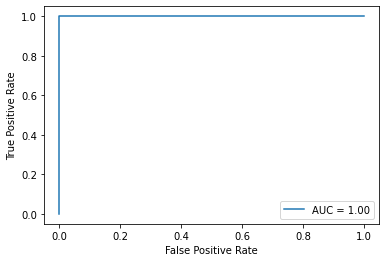

In [44]:
print("ROC curve:")
display1 = RocCurveDisplay(roc_auc=roc_auc_score(Y_test, adam_mlpc_predict),
                           fpr=roc_curve(Y_test, adam_mlpc_predict)[0],
                           tpr=roc_curve(Y_test, adam_mlpc_predict)[1])
display1.plot()
plt.show()

Precision recall curve:


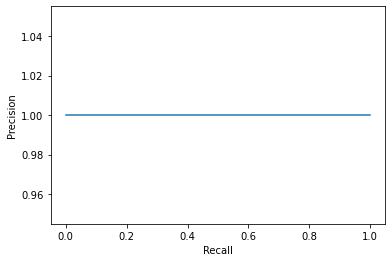

In [45]:
print("Precision recall curve:")
display2 = PrecisionRecallDisplay(precision=precision_recall_curve(Y_test, adam_mlpc_predict)[0],
                                  recall=precision_recall_curve(Y_test, adam_mlpc_predict)[1])
display2.plot()
plt.show()

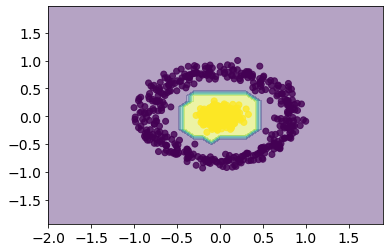

In [106]:
plt.figure()
plot_db(X_train, Y_train, adam_mlpc)
plt.show()

In [46]:
pipe_gaussiannb = Pipeline([('clf', GaussianNB())])

GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [47]:
param_grid = {'clf__priors': [None], 'clf__var_smoothing': [0.05, 0.043875, 0.03775, 0.031625, 0.0255]}

best_estimator_gaussiannb = GridSearchCV(pipe_gaussiannb, param_grid=param_grid, cv=5)

best_estimator_gaussiannb.fit(X_train, Y_train)

best_estimator_gaussiannb_predict = best_estimator_gaussiannb.predict(X_test)
print(best_estimator_gaussiannb.best_params_)

{'clf__priors': None, 'clf__var_smoothing': 0.05}


In [48]:
print("PRECISION:", precision_score(Y_test, best_estimator_gaussiannb_predict))
print("RECALL:", recall_score(Y_test, best_estimator_gaussiannb_predict))
print("F1:", f1_score(Y_test, best_estimator_gaussiannb_predict))
print('roc_auc_score:', roc_auc_score(Y_test, best_estimator_gaussiannb_predict))

PRECISION: 1.0
RECALL: 0.9803921568627451
F1: 0.99009900990099
roc_auc_score: 0.9901960784313726


CONFUSION MATRIX TEST:


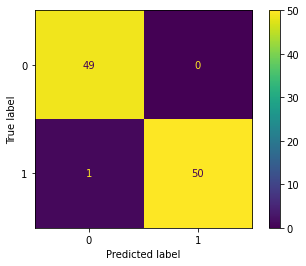

In [49]:
print("CONFUSION MATRIX TEST:")

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, best_estimator_gaussiannb_predict))
display.plot()
plt.show()

ROC curve:


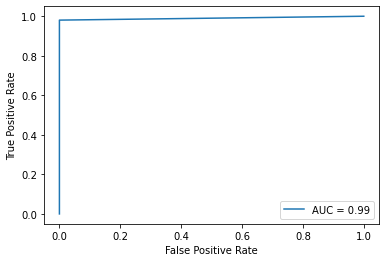

In [50]:
print("ROC curve:")
display1 = RocCurveDisplay(roc_auc=roc_auc_score(Y_test, best_estimator_gaussiannb_predict),
                           fpr=roc_curve(Y_test, best_estimator_gaussiannb_predict)[0],
                           tpr=roc_curve(Y_test, best_estimator_gaussiannb_predict)[1])
display1.plot()
plt.show()

Precision recall curve:


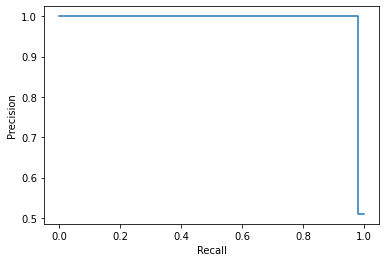

In [51]:
print("Precision recall curve:")
display2 = PrecisionRecallDisplay(precision=precision_recall_curve(Y_test, best_estimator_gaussiannb_predict)[0],
                                  recall=precision_recall_curve(Y_test, best_estimator_gaussiannb_predict)[1])
display2.plot()
plt.show()

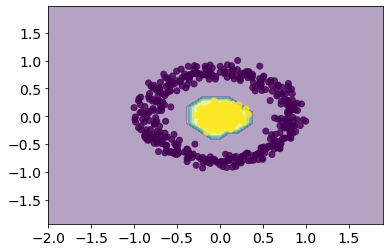

In [107]:
plt.figure()
plot_db(X_train, Y_train, best_estimator_gaussiannb)
plt.show()

In [52]:
GradientBoostingClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [65]:
%%time
gbc = GradientBoostingClassifier(learning_rate=0.1, subsample=1.0, max_features='auto')
gbc.fit(X_train, Y_train)
gbc_predict = gbc.predict(X_test)
gbc.score(X_test, Y_test)

Wall time: 88.7 ms


0.99

In [66]:
print("ACCURACY (test, train):", (round(gbc.score(X_test, Y_test), 3), round(gbc.score(X_train, Y_train), 3)))
print("PRECISION:", precision_score(Y_test, gbc_predict))
print("RECALL:", recall_score(Y_test, gbc_predict))
print("F1:", f1_score(Y_test, gbc_predict))
print("roc_auc_score:", roc_auc_score(Y_test, gbc_predict))

ACCURACY (test, train): (0.99, 1.0)
PRECISION: 1.0
RECALL: 0.9803921568627451
F1: 0.99009900990099
roc_auc_score: 0.9901960784313726


In [67]:
gbc1 = GradientBoostingClassifier(learning_rate=0.0005, subsample=0.1, max_features=1)
gbc1.fit(X_train, Y_train)
gbc1_predict = gbc.predict(X_test)
gbc1.score(X_test, Y_test)

0.99

In [68]:
print("ACCURACY (test, train):", (round(gbc1.score(X_test, Y_test), 3), round(gbc1.score(X_train, Y_train), 3)))
print("PRECISION:", precision_score(Y_test, gbc1_predict))
print("RECALL:", recall_score(Y_test, gbc1_predict))
print("F1:", f1_score(Y_test, gbc1_predict))
print("roc_auc_score:", roc_auc_score(Y_test, gbc1_predict))

ACCURACY (test, train): (0.99, 0.979)
PRECISION: 1.0
RECALL: 0.9803921568627451
F1: 0.99009900990099
roc_auc_score: 0.9901960784313726


In [69]:
gbc2 = GradientBoostingClassifier(learning_rate=0.1, subsample=1, max_features='sqrt')
gbc2.fit(X_train, Y_train)
gbc2_predict = gbc.predict(X_test)
gbc2.score(X_test, Y_test)

0.99

In [70]:
print("ACCURACY (test, train):", (round(gbc2.score(X_test, Y_test), 3), round(gbc2.score(X_train, Y_train), 3)))
print("PRECISION:", precision_score(Y_test, gbc2_predict))
print("RECALL:", recall_score(Y_test, gbc2_predict))
print("F1:", f1_score(Y_test, gbc2_predict))
print("roc_auc_score:", roc_auc_score(Y_test, gbc2_predict))

ACCURACY (test, train): (0.99, 1.0)
PRECISION: 1.0
RECALL: 0.9803921568627451
F1: 0.99009900990099
roc_auc_score: 0.9901960784313726


In [71]:
%%time
gbc_es = GradientBoostingClassifier(learning_rate=0.1, subsample=1.0, max_features='auto', validation_fraction=0.2, 
                                    n_iter_no_change=10, tol=0.01)
gbc_es.fit(X_train, Y_train)
gbc_es_predict = gbc.predict(X_test)
gbc_es.score(X_test, Y_test)

Wall time: 57.4 ms


0.99

In [72]:
print("ACCURACY (test, train):", (round(gbc_es.score(X_test, Y_test), 3), round(gbc_es.score(X_train, Y_train), 3)))
print("PRECISION:", precision_score(Y_test, gbc_es_predict))
print("RECALL:", recall_score(Y_test, gbc_es_predict))
print("F1:", f1_score(Y_test, gbc_es_predict))
print("roc_auc_score:", roc_auc_score(Y_test, gbc_es_predict))

ACCURACY (test, train): (0.99, 1.0)
PRECISION: 1.0
RECALL: 0.9803921568627451
F1: 0.99009900990099
roc_auc_score: 0.9901960784313726


In [73]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [75]:
%%time
rfc = RandomForestClassifier(max_depth=4, min_samples_split=2, max_features='auto')
rfc.fit(X_train, Y_train)
rfc_predict = gbc.predict(X_test)
rfc.score(X_test, Y_test)

Wall time: 139 ms


0.99

In [76]:
print("ACCURACY (test, train):", (round(rfc.score(X_test, Y_test), 3), round(rfc.score(X_train, Y_train), 3)))
print("PRECISION:", precision_score(Y_test, rfc_predict))
print("RECALL:", recall_score(Y_test, rfc_predict))
print("F1:", f1_score(Y_test, rfc_predict))
print("roc_auc_score:", roc_auc_score(Y_test, rfc_predict))

ACCURACY (test, train): (0.99, 1.0)
PRECISION: 1.0
RECALL: 0.9803921568627451
F1: 0.99009900990099
roc_auc_score: 0.9901960784313726


In [79]:
rfc1 = RandomForestClassifier(max_depth=2, min_samples_split=5, max_features='log2')
rfc1.fit(X_train, Y_train)
rfc1_predict = gbc.predict(X_test)
rfc1.score(X_test, Y_test)

0.99

In [80]:
print("ACCURACY (test, train):", (round(rfc1.score(X_test, Y_test), 3), round(rfc1.score(X_train, Y_train), 3)))
print("PRECISION:", precision_score(Y_test, rfc1_predict))
print("RECALL:", recall_score(Y_test, rfc1_predict))
print("F1:", f1_score(Y_test, rfc1_predict))
print("roc_auc_score:", roc_auc_score(Y_test, rfc1_predict))

ACCURACY (test, train): (0.99, 0.994)
PRECISION: 1.0
RECALL: 0.9803921568627451
F1: 0.99009900990099
roc_auc_score: 0.9901960784313726


In [81]:
rfc2 = RandomForestClassifier(max_depth=56, min_samples_split=2, max_features='sqrt')
rfc2.fit(X_train, Y_train)
rfc2_predict = gbc.predict(X_test)
rfc2.score(X_test, Y_test)

0.99

In [82]:
print("ACCURACY (test, train):", (round(rfc2.score(X_test, Y_test), 3), round(rfc2.score(X_train, Y_train), 3)))
print("PRECISION:", precision_score(Y_test, rfc2_predict))
print("RECALL:", recall_score(Y_test, rfc2_predict))
print("F1:", f1_score(Y_test, rfc2_predict))
print("roc_auc_score:", roc_auc_score(Y_test, rfc2_predict))

ACCURACY (test, train): (0.99, 1.0)
PRECISION: 1.0
RECALL: 0.9803921568627451
F1: 0.99009900990099
roc_auc_score: 0.9901960784313726


In [90]:
list_n_estimators_f1 = []
for x in range(1, 100):
    i = RandomForestClassifier(n_estimators=x, bootstrap=False, max_samples=0.9)
    i.fit(X_train, Y_train)
    list_n_estimators_f1.append(f1_score(Y_test, i.predict(X_test)))

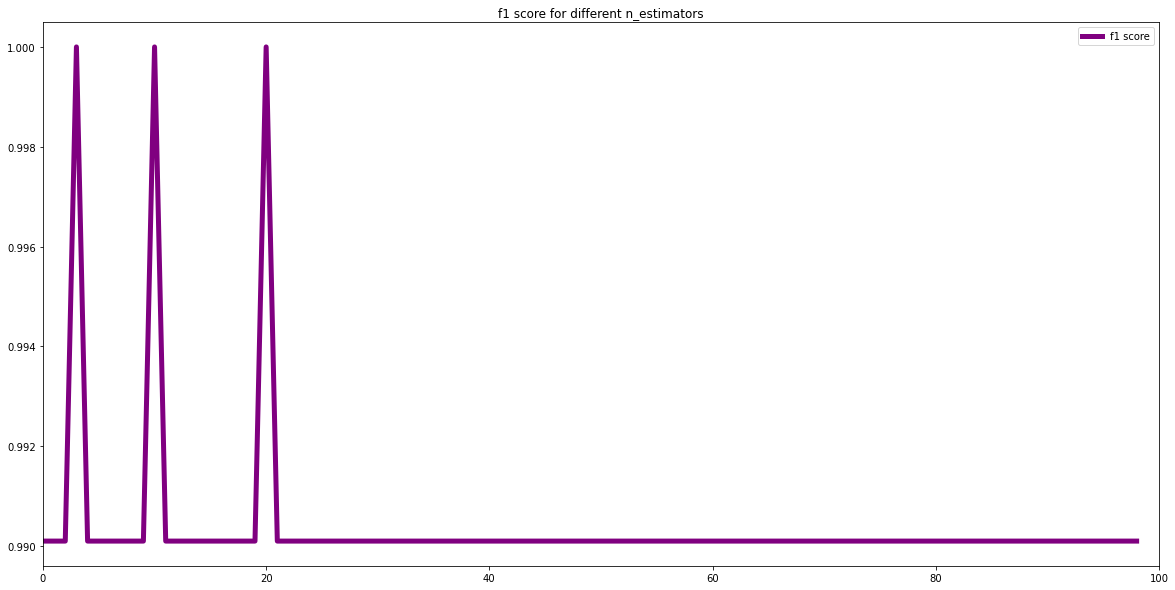

In [89]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.xlim([0,100])
ax.plot(list_n_estimators_f1, c='purple', lw=5, label='f1 score');
plt.legend()
plt.title('f1 score for different n_estimators');